# London Housing 

## Objectives

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 


#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
# Checking the sape of dataframe
properties.shape

(316, 49)

In [4]:
# Looking into head rows
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [5]:
# Transposing DF
properties_t = properties.T
properties_t.head()

,0,1,2,3,4,5,6,7,8,9,...,306,307,308,309,310,311,312,313,314,315
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,882872,786627,827659,798499,825742,770972,794277,762757,744324,864354
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,300526,304556,304924,301702,304764,305053,310281,314068,319589,317185
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,518175,523280,529660,533619,529762,530931,533160,541622,536096,534005
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,340893,344091,346680,345061,345459,347116,353710,358243,361861,367015


In [6]:
# London boroughs should not be row indexes as we are going to analyze boroughs, they should be within DF. 
# Re-setting row indexes as numerical range index and checking DF with re-set index.
properties_t = properties_t.reset_index()
properties_t.head()

,index,0,1,2,3,4,5,6,7,8,...,306,307,308,309,310,311,312,313,314,315
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,882872,786627,827659,798499,825742,770972,794277,762757,744324,864354
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,300526,304556,304924,301702,304764,305053,310281,314068,319589,317185
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,518175,523280,529660,533619,529762,530931,533160,541622,536096,534005
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,340893,344091,346680,345061,345459,347116,353710,358243,361861,367015


In [212]:
# Cool, looks better, but 1st numerical row should be removed and have date as columns index.
properties_t.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           293,     294,     295,     296,     297,     298,     299,     300,
           301,     302],
      dtype='object', length=304)

In [213]:
# Let`s re-assign 0 index row as column label
properties_t.columns = properties_t.iloc[0]
properties_t.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588


In [214]:
# Columns label is re-set as date and now we can drop 0 index row, so we do not have duplicates
properties_t = properties_t.drop([0])
properties_t.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482101,474460,472981,487091,500800,494697,432511,429917,425607,479542


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [215]:
# The next step is to rename Unnamed:0 as London_Boroughs and NaN column label as ID using df.rename()
properties_t = properties_t.rename(columns={"Unnamed: 0":"London_Boroughs", pd.NaT:"ID"})
properties_t.head()

,London_Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,718930,761786,738370,795632,792195,827375,778870,739645,748457,730282
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,295829,295179,299060,300402,305488,304563,306376,301435,303631,298960
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,504765,512818,515235,528958,527691,525985,522683,519037,518271,526024
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337543,339684,338257,337745,334075,333853,334044,336579,335492,341588
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482101,474460,472981,487091,500800,494697,432511,429917,425607,479542


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [216]:
# Melting df based on London_Boroughs and ID 
properties_clean = pd.melt(properties_t, id_vars = ['London_Boroughs','ID'])
properties_clean.head()

,London_Boroughs,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [217]:
# Next step, need to rename column labels as column "0" represents date and column "value" represents daily average price
properties_clean = properties_clean.rename(columns={0:"Date","value":"Average_Price"})
properties_clean.head()

,London_Boroughs,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [218]:
# Checking column data types before updating
properties_clean.dtypes

London_Boroughs            object
ID                         object
Date               datetime64[ns]
Average_Price              object
dtype: object

In [219]:
# Average_Price columns values data type should be changed to a floating number from object type
properties_clean["Average_Price"] = pd.to_numeric(properties_clean["Average_Price"])

# Check columns data types again
properties_clean.dtypes

London_Boroughs            object
ID                         object
Date               datetime64[ns]
Average_Price             float64
dtype: object

In [220]:
# Checking if there are any NaN values 
properties_clean.isnull().sum()

London_Boroughs      0
ID                 906
Date                 0
Average_Price      906
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [221]:
properties_clean["London_Boroughs"].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [222]:
#Check Unnamed: 34 rows and see if they contain any valueable information
properties_clean[properties_clean["London_Boroughs"]=="Unnamed: 34"].head()

,London_Boroughs,ID,Date,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [223]:
# Check shape of df before dropping NaNs
properties_clean.shape

(14496, 4)

In [224]:
# NaN values do not contain anything useful for our analysis, so we could drop them
# currently, there are 14496 rows and dropping 906 rows, we should get clean df w/o NaNs and rows should be 13590
properties_noNaNs = properties_clean.dropna(subset=['Average_Price'])
properties_noNaNs

,London_Boroughs,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
14490,EAST OF ENGLAND,E12000006,2020-02-01,286869.06350
14491,LONDON,E12000007,2020-02-01,476972.07330
14492,SOUTH EAST,E12000008,2020-02-01,321329.36450
14493,SOUTH WEST,E12000009,2020-02-01,258043.97170


In [225]:
# check unique boroughs
properties_noNaNs["London_Boroughs"].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [226]:
# London_Boroughs column contain non-boroughs
# Non-borough rows should be dropped from df
# Creating a list with non_Boroughs
non_Boroughs = ['Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']

In [227]:
df = properties_noNaNs[~properties_noNaNs["London_Boroughs"].isin(non_Boroughs)]
df.head(40)

,London_Boroughs,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692
6,Camden,E09000007,1995-01-01,120932.88810
7,Croydon,E09000008,1995-01-01,69158.16225
8,Ealing,E09000009,1995-01-01,79885.89069
9,Enfield,E09000010,1995-01-01,72514.69096


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9966 entries, 0 to 14480
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   London_Boroughs  9966 non-null   object        
 1   ID               9966 non-null   object        
 2   Date             9966 non-null   datetime64[ns]
 3   Average_Price    9966 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 389.3+ KB


!!! YAY !!! DATA CLEANING IS DONE !!!

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [229]:
# Subsetting Barnet borough
barnet = df[df["London_Boroughs"]=="Barnet"]
barnet.head()

,London_Boroughs,ID,Date,Average_Price
2,Barnet,E09000003,1995-01-01,93284.51832
50,Barnet,E09000003,1995-02-01,93190.16963
98,Barnet,E09000003,1995-03-01,92247.52435
146,Barnet,E09000003,1995-04-01,90762.87492
194,Barnet,E09000003,1995-05-01,90258.00033


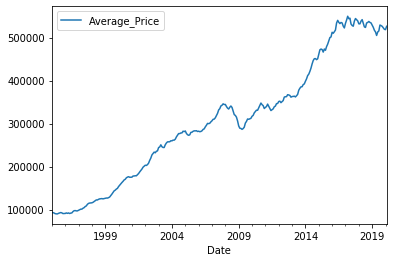

In [230]:
barnet_plot = barnet.plot(kind="line", x="Date", y="Average_Price")

In [231]:
# Labelling y-axis as Price
barnet_plot.set_ylabel("Price")

Text(3.200000000000003, 0.5, 'Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [232]:
# adding a new column
df["Year"] = df["Date"].apply(lambda d: d.year)

In [233]:
# checking a newly added column
df.head()

,London_Boroughs,ID,Date,Average_Price,Year
0,City of London,E09000001,1995-01-01,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660,1995
2,Barnet,E09000003,1995-01-01,93284.51832,1995
3,Bexley,E09000004,1995-01-01,64958.09036,1995
4,Brent,E09000005,1995-01-01,71306.56698,1995


In [234]:
# group df by Borough and Year mean
dfg = df.groupby(by=["London_Boroughs","Year"]).mean()

In [235]:
dfg.sample()

,,Average_Price
London_Boroughs,Year,
City of London,1998,148031.894542


In [236]:
# Reset index 
dfg = dfg.reset_index()

In [237]:
dfg.head()

,London_Boroughs,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


In [238]:
df_sorted = dfg.sort_values(by="Average_Price", ascending=False)

In [239]:
print(df_sorted.head())

          London_Boroughs  Year  Average_Price
517  Kensington & Chelsea  2018   1.363880e+06
516  Kensington & Chelsea  2017   1.344540e+06
514  Kensington & Chelsea  2015   1.302103e+06
513  Kensington & Chelsea  2014   1.288406e+06
515  Kensington & Chelsea  2016   1.276235e+06


In [240]:
print(df_sorted.tail())

        London_Boroughs  Year  Average_Price
2    Barking & Dagenham  1997   55974.262309
625              Newham  1996   55747.012583
624              Newham  1995   54574.226405
0    Barking & Dagenham  1995   51817.969390
1    Barking & Dagenham  1996   51718.192690


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [242]:
# create a function which will be comparing values of 1998 vs 2018
def price_ratio(d):
    y1998 = float(d["Average_Price"][d["Year"] == 1998])
    y2018 = float(d["Average_Price"][d["Year"] == 2018])
    ratio = [y2018/y1998]
    return ratio

In [243]:
# call function with borough name Barking & Dagenham
price_ratio(dfg[dfg['London_Boroughs'] == 'Barking & Dagenham'])

[4.89661861291754]

In [244]:
# Create an empty dictionary to store ratios
final = {}

In [245]:
for i in dfg["London_Boroughs"].unique():
    borough = dfg[dfg["London_Boroughs"] == i]
    final[i] = price_ratio(borough)
    
print(final)

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.0947846853338765], 'Camden': [4.935353408884261], 'City of London': [5.301620377587609], 'Croydon': [4.201100280024767], 'Ealing': [4.311450902121834], 'Enfield': [4.26347158349581], 'Greenwich': [4.763036347329193], 'Hackney': [6.198285561008662], 'Hammersmith & Fulham': [4.137798101936229], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335308], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802298], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514063], 'Lewisham': [5.449221041059685], 'Merton': [4.741273313294604], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379376], 'Sutton': [4.118522608573

In [246]:
# Create a df from final dictionary:
df_ratios = pd.DataFrame(final)

In [247]:
# get top 5 
df_ratios.head()

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,4.896619,4.358196,4.248977,4.894554,4.094785,4.935353,5.30162,4.2011,4.311451,4.263472,...,4.741273,5.30539,4.471182,4.005162,5.516485,4.118523,4.626701,5.834756,4.757709,5.353565


In [248]:
# everything is stored in 1 line, let`s transpose as we did above
df_ratios_t = df_ratios.T

In [249]:
# Reset index
df_ratios_f = df_ratios_t.reset_index()

In [250]:
# lets see df
df_ratios_f.head()

,index,0
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [251]:
# column labels need to be renamed
df_ratios_f.rename(columns={"index":"LondonBoroughs", 0:"Ratios: 2018 vs 1998"}, inplace=True)

In [252]:
top_10 = df_ratios_f.sort_values(by="Ratios: 2018 vs 1998", ascending=False).head(10)

In [253]:
print(top_10)

          LondonBoroughs  Ratios: 2018 vs 1998
11               Hackney              6.198286
30        Waltham Forest              5.834756
27             Southwark              5.516485
22              Lewisham              5.449221
32           Westminster              5.353565
24                Newham              5.305390
6         City of London              5.301620
13              Haringey              5.134625
19  Kensington & Chelsea              5.082465
21               Lambeth              4.957751


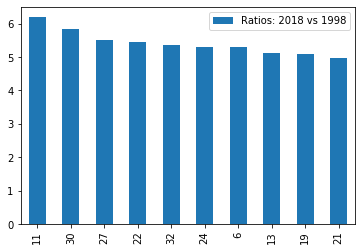

In [254]:
pl = top_10[["LondonBoroughs","Ratios: 2018 vs 1998"]].plot(kind="bar")

In [255]:
pl.set_xticklabels(top_10.LondonBoroughs)

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth')]